Tunable Laser Calculation

In [1]:
from decimal import Decimal
import numpy as np
import matplotlib.pyplot as plt

In [3]:
OPL_actual = 3 # (in meters). Used to simulate data
def OPL(lambda_start, lambda_end, num_points, OPL_actual):
    # Calculate wavelength range and phase
    lambda_range = np.linspace(lambda_start, lambda_end, num_points)
    
    intensity = (2 * np.pi * OPL_actual / lambda_range) % (2 * np.pi) # phase of the wave at a distance of 3 meters. 2pi*d/lambda
    idx = np.where((intensity[:-1] >= intensity[0]) & (intensity[1:] <= intensity[0]))[0] # idx of first phi values over the initial phi value
    arange = (lambda_end-lambda_start)/(num_points-1) # Distance between each point
    second_diff = intensity[idx[1]]-intensity[idx[1]+1] # Difference in phi between first point with a phi greater thant he first point and the immediate next point
    initial_diff = intensity[idx[1]]-intensity[idx[0]] # Difference in phi between first point and the first point with a phi greater than the first point
    percent_diff = initial_diff/second_diff # percent difference between the two above differences in order to nail down the precise phase difference corresponding tot he respective lambda
    delta_lambda = lambda_range[idx[1]]+(percent_diff*arange)-lambda_start #change in wavelength to get N-1 total waves
    lambda_2 = lambda_start + delta_lambda
    C = intensity[0]/(2*np.pi)
    N = (-lambda_2 + lambda_2*C - lambda_start*C)/(lambda_start-lambda_2)
    OPL = lambda_start * (N+C)

    return OPL, lambda_range, intensity, idx

In [4]:
def plot_OPL(lambda_range: np.ndarray, intensity: np.ndarray):
    plt.figure(figsize=(10, 6))
    plt.plot(lambda_range, intensity, label='Phase')
    plt.scatter(lambda_range, intensity, color='black', s=30)
    plt.xlabel('Wavelength (m)')
    plt.ylabel('Phase (rad)')
    plt.title('Phase vs Wavelength')
    plt.grid(True)
    plt.legend()
    plt.show()

In [5]:
OPL_value, lambda_range, intensity, idx = OPL(630e-9, 630.001e-9, 50, 3)

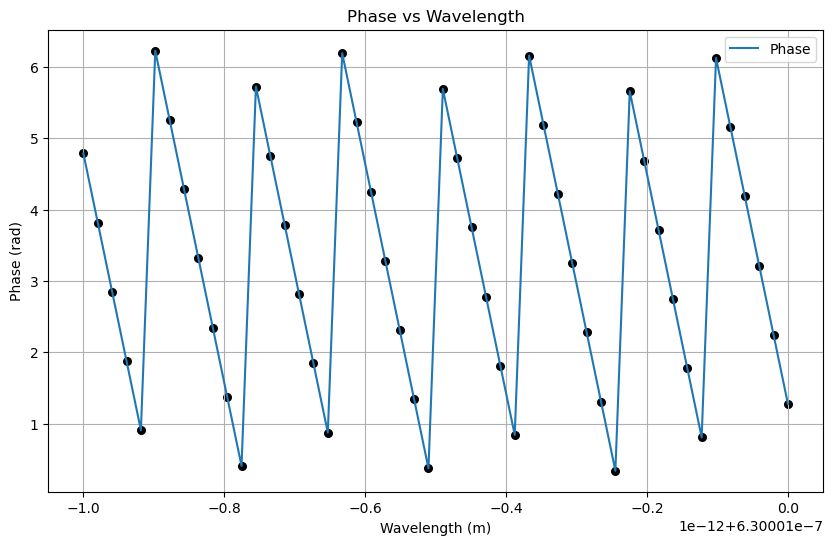

Calculated OPL: 2.999999997047821


In [6]:
plot_OPL(lambda_range, intensity)

print(f"Calculated OPL: {OPL_value}")

In [7]:
lambda_start = 630e-9
lambda_end = 630.001e-9
num_points = 50
lambda_range = np.linspace(lambda_start, lambda_end, num_points)

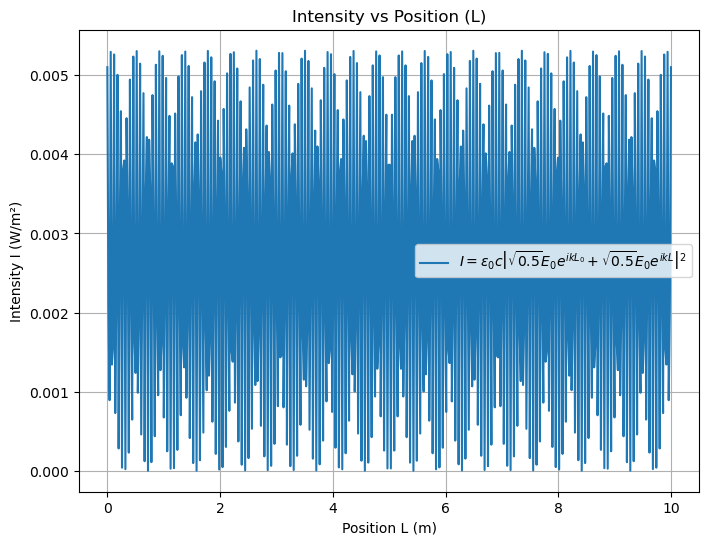

In [8]:
epsilon_0 = 8.85e-12  # Vacuum permittivity (F/m)
c = 3e8  # Speed of light (m/s)
E_0 = 1  # Electric field amplitude (V/m) (can be adjusted)
k = 2 * np.pi / lambda_start  # Wave number (for wavelength = 0.5 m, for example)

# Distance range for L and L0
L_values = np.linspace(0, 10, 500)  # Position L varies from 0 to 10 meters
L_0 = 5  # Let's assume L0 is fixed at 5 meters

# Intensity calculation
term1 = np.sqrt(0.5) * E_0 * np.exp(1j * k * L_0)
term2 = np.sqrt(0.5) * E_0 * np.exp(1j * k * L_values)
I = epsilon_0 * c * np.abs(term1 + term2)**2  # Intensity

# Plot
plt.figure(figsize=(8, 6))
plt.plot(L_values, I, label=r'$I = \varepsilon_0 c \left|\sqrt{0.5} E_0 e^{ikL_0} + \sqrt{0.5} E_0 e^{ikL}\right|^2$')
plt.title('Intensity vs Position (L)')
plt.xlabel('Position L (m)')
plt.ylabel('Intensity I (W/m²)')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
def OPL(lambda_start, lambda_end, num_points, OPL_actual):

  #The lambda (wavelength in m) we choose to do our measurements with.
  lambda_range = np.linspace(lambda_start, lambda_end, num_points)

  # intensity of the wave at a distance of 3 meters at each lambda_range value.
  measured_intensity = (2 * np.pi * OPL_actual / lambda_range) % (2 * np.pi)

  # finds the idx of the first phase value that is just above the initial phi value (Only works with enough enough precision)
  idx = np.where((measured_intensity[:-1] >= measured_intensity[0]) & (measured_intensity[1:] <= measured_intensity[0]))[0]

  # Distance between each point
  arange = (lambda_end-lambda_start)/(num_points-1)

  # Difference in phase between first point with a phi greater than the first point, and the immediate next point
  second_diff = measured_intensity[idx[1]]-measured_intensity[idx[1]+1]

  # Difference in phi between first point and the first point with a phi greater than the first point
  initial_diff = measured_intensity[idx[1]]-measured_intensity[idx[0]]

  # percent difference between the two above points in order to nail down the precise phase difference corresponding to the respective lambda
  percent_diff = initial_diff/second_diff

  # Finds the exact wavelength change to get from N total waves to N-1 total waves.
  # (Exact wavelength change to get from the initial phase values to the very next phase value when minutely adjusting lambda)
  delta_lambda = lambda_range[idx[1]]+(percent_diff*arange)-lambda_start

  # The wavelength that corresponds to N-1 total waves
  lambda_2 = lambda_start + delta_lambda

  # Distance = lambda*(N+phase/2pi) = (c/v)*(N+phase/2pi)
  C = measured_intensity[0]/(2*np.pi)
  N = (-lambda_2 + lambda_2*C - lambda_start*C)/(lambda_start-lambda_2)
  OPL = lambda_start * (N+C)

  plt.plot(lambda_range, measured_intensity)
  plt.scatter(lambda_range, measured_intensity, color = 'black')

  return OPL

2.999999997047821

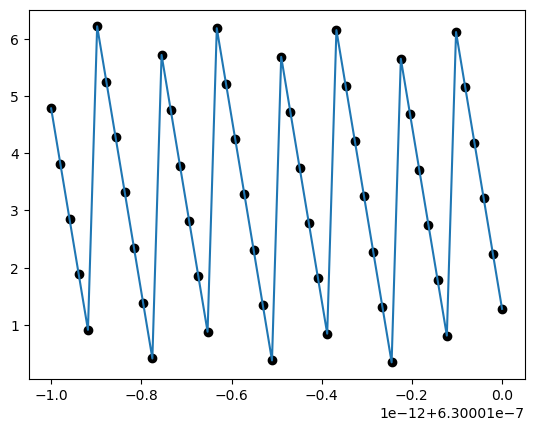

In [10]:
#Example
OPL(630e-9, 630.001e-9, 50, 3)

In [11]:
lambda_range = np.linspace(630e-9, 630.001e-9, 50)

In [12]:
lambda_range

array([6.30000000e-07, 6.30000020e-07, 6.30000041e-07, 6.30000061e-07,
       6.30000082e-07, 6.30000102e-07, 6.30000122e-07, 6.30000143e-07,
       6.30000163e-07, 6.30000184e-07, 6.30000204e-07, 6.30000224e-07,
       6.30000245e-07, 6.30000265e-07, 6.30000286e-07, 6.30000306e-07,
       6.30000327e-07, 6.30000347e-07, 6.30000367e-07, 6.30000388e-07,
       6.30000408e-07, 6.30000429e-07, 6.30000449e-07, 6.30000469e-07,
       6.30000490e-07, 6.30000510e-07, 6.30000531e-07, 6.30000551e-07,
       6.30000571e-07, 6.30000592e-07, 6.30000612e-07, 6.30000633e-07,
       6.30000653e-07, 6.30000673e-07, 6.30000694e-07, 6.30000714e-07,
       6.30000735e-07, 6.30000755e-07, 6.30000776e-07, 6.30000796e-07,
       6.30000816e-07, 6.30000837e-07, 6.30000857e-07, 6.30000878e-07,
       6.30000898e-07, 6.30000918e-07, 6.30000939e-07, 6.30000959e-07,
       6.30000980e-07, 6.30001000e-07])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [3]:
c = 3e8
def del_lambda(del_f, lambda_start):
    return del_f * lambda_start**2 / c

In [5]:
delta_x = 2.53 #m
lambda_start = 635e-9  # m
lambda_end = 635.001e-9    # m
num_points = 100       # Number of wavelength samples
del_f = 5e6 # _ Hz Tunable laser step size

lambdas = np.arange(lambda_start, lambda_end, del_lambda(del_f, lambda_start))

intensity1 = 0.25*(1+np.sin(np.pi/4 + 2*np.pi*delta_x/lambdas))
intensity2 = 0.25*(1-np.cos(np.pi/4 + 2*np.pi*delta_x/lambdas))

# Find peaks
peaks, _ = find_peaks(intensity1)
num_peaks = len(peaks)
print("Number of fringes: ", num_peaks)

Number of fringes:  6


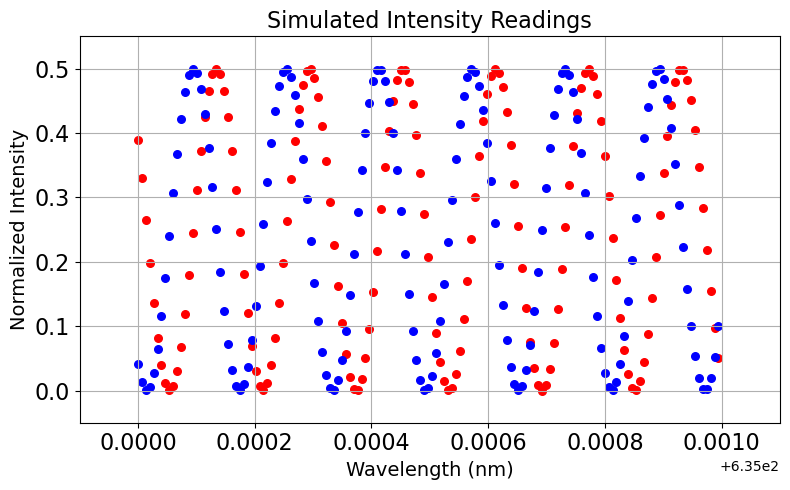

In [11]:
# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(lambdas * 1e9, intensity1, color='red', s=30)
plt.scatter(lambdas * 1e9, intensity2, color='blue', s=30)
plt.xlabel("Wavelength (nm)", fontsize = 14)
plt.ylabel("Normalized Intensity", fontsize = 14)
plt.title("Simulated Intensity Readings", fontsize = 16)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(634.9999, 635.0011)
plt.ylim(-0.05, 0.55)
plt.tight_layout()
plt.show()

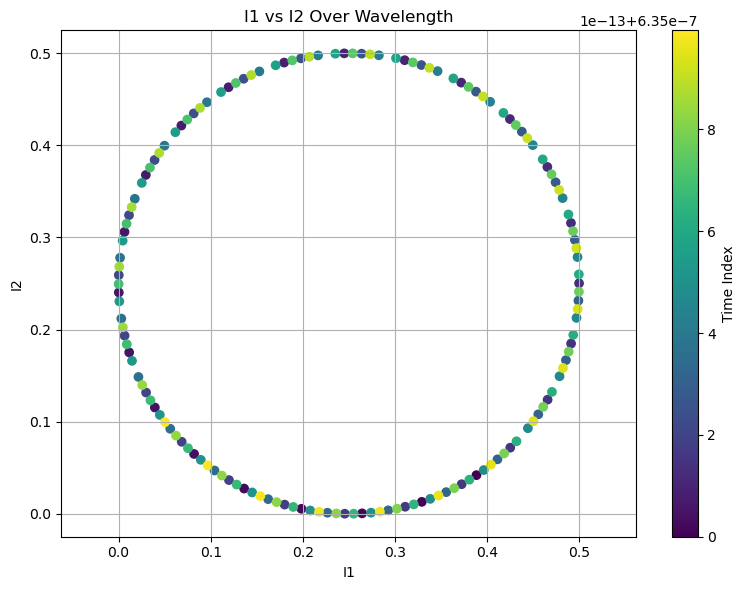

In [13]:
#SCATTER PLOT
plt.figure(figsize=(8, 6))
sc = plt.scatter(intensity1, intensity2, c=lambdas, cmap='viridis')  # Use colormap to encode time
plt.xlabel("I1")
plt.ylabel("I2")
plt.title("I1 vs I2 Over Wavelength")
plt.colorbar(sc, label="Time Index")
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

FOR THURSDAY 9/11

1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Intensity')

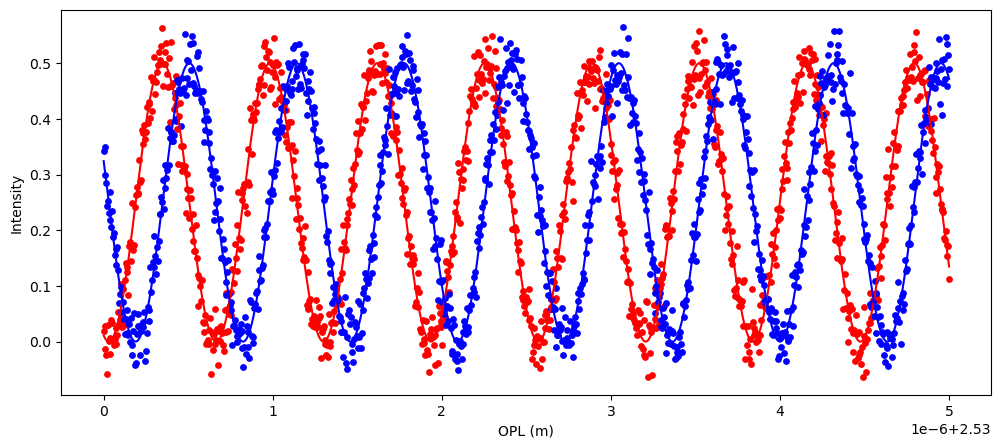

In [3]:
wavelength = 635e-9 #m
wavelength_measured = wavelength*(1 + np.random.normal(0,1e-5))

#Delay Line Length
delta_x_start = 2.53 #m
delta_x_end = 2.530005 #m
deltas = np.linspace(delta_x_start, delta_x_end, 1000)

I1 = 0.25*(1+np.sin(np.pi/4 + 2*np.pi*deltas/wavelength_measured))
I2 = 0.25*(1-np.cos(np.pi/4 + 2*np.pi*deltas/wavelength_measured))

# --- Add noise ---
rng = np.random.default_rng(seed=43)

# Multiplicative noise (±x%)
percent = 0.03
I1_noisy = I1 + percent * rng.standard_normal(len(deltas))
I2_noisy = I2 + percent * rng.standard_normal(len(deltas))

plt.figure(figsize=(12, 5))
plt.plot(deltas, I1, color="red")
plt.plot(deltas, I2, color="blue")
plt.scatter(deltas, I1_noisy, label="I1 noisy", s=15, color="red")
plt.scatter(deltas, I2_noisy, label="I2 noisy", s=15, color="blue")
plt.xlabel('OPL (m)')
plt.ylabel('Intensity')

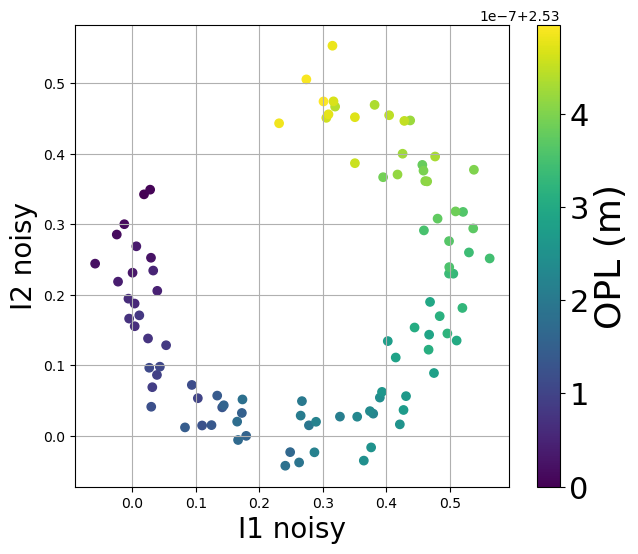

In [5]:
plt.figure(figsize=(7, 6))

plt.scatter(I1_noisy[0:100], I2_noisy[0:100], c=deltas[0:100], cmap="viridis")

# Colorbar
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22)
cbar.set_label('OPL (m)', fontsize=26)   # label matches the data

plt.xlabel("I1 noisy", fontsize=20)
plt.ylabel("I2 noisy", fontsize=20)
plt.grid(True)
plt.show()

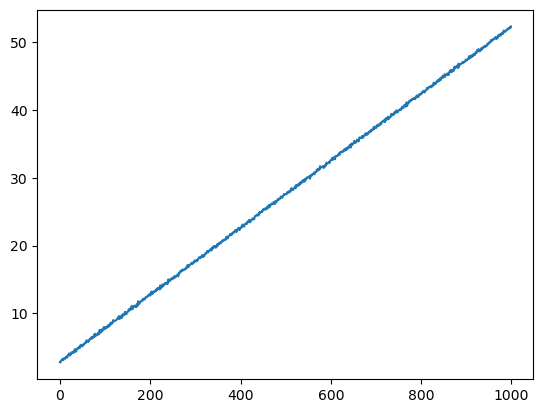

In [7]:
phi = np.arctan2(I2_noisy-0.25, I1_noisy-0.25)
phi = np.unwrap(phi)
plt.plot(phi)

In [9]:
print((phi[-1] - phi[0])/(2*np.pi)*wavelength_measured) # Calculated straight from data
print(delta_x_end - delta_x_start) # Ideal Result

5.012127619435827e-06
5.000000000254801e-06


Mean OPL estimate: 5.000e-06 m
Std dev: 1.696e-08 m


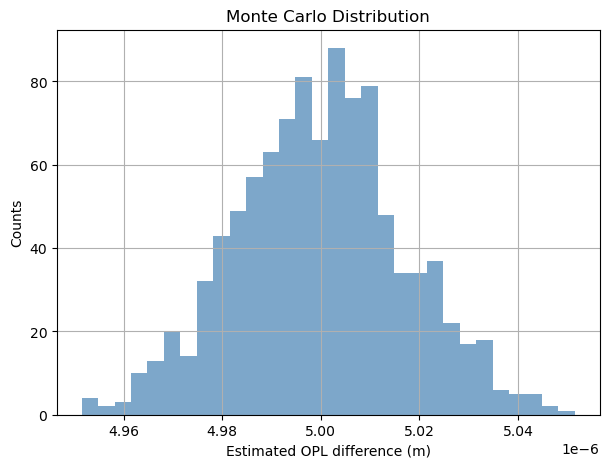

In [11]:
wavelength = 635e-9  # m
delta_x_start = 2.53 # m
delta_x_end = 2.530005 # m
deltas = np.linspace(delta_x_start, delta_x_end, 1000)

percent = 0.03   # noise level
n_trials = 1000   # Monte Carlo runs

results = []
rng = np.random.default_rng(seed=123)

for _ in range(n_trials):
    wavelength_measured = wavelength * (1 + rng.normal(0, 1e-5))

    I1 = 0.25 * (1 + np.sin(np.pi/4 + 2*np.pi*deltas/wavelength_measured))
    I2 = 0.25 * (1 - np.cos(np.pi/4 + 2*np.pi*deltas/wavelength_measured))

    I1_noisy = I1 + percent * rng.standard_normal(len(deltas))
    I2_noisy = I2 + percent * rng.standard_normal(len(deltas))

    phi = np.arctan2(I2_noisy - 0.25, I1_noisy - 0.25)
    phi = np.unwrap(phi)

    opl_est = (phi[-1] - phi[0])/(2*np.pi) * wavelength_measured
    results.append(opl_est)

results = np.array(results)

print(f"Mean OPL estimate: {results.mean():.3e} m")
print(f"Std dev: {results.std():.3e} m")

plt.figure(figsize=(7,5))
plt.hist(results, bins=30, color="steelblue", alpha=0.7)
plt.xlabel("Estimated OPL difference (m)")
plt.ylabel("Counts")
plt.title("Monte Carlo Distribution")
plt.grid(True)
plt.show()

2)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def del_lambda(lam, d_nu):
    c = 3e8 #m/s
    return (lam**2/c) * d_nu

5.82652501660141e-14


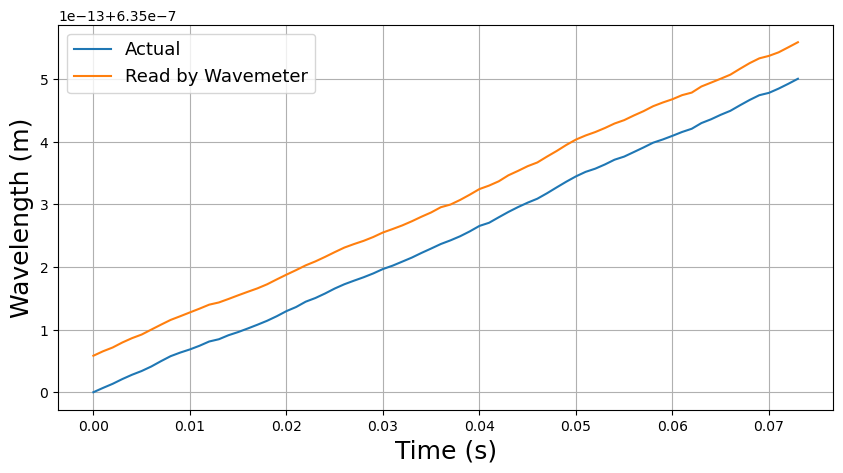

In [133]:
lambda_start_real = 635e-9 #m #not precisecly known! #precise value is used for simulation accuracy
lambda_end_real = 635.0005e-9 #m #not precisecly known! #precise value is used for simulation accuracy

# SIMULATING THE ACTUAL DATA + NOISE(MECHANICS OF THE TUNABLE LASER)

d_nu = 5e6 # Hz # Tuning STEP size resolution

percent_jitter = 0.2   # ±20% variation #Used to simulate imperfection in piezo mechanics
rng = np.random.default_rng(seed=0)

# Iteratively build wavelength array
mech_lambdas = [lambda_start_real]
while mech_lambdas[-1] < lambda_end_real:
    jitter = 1 + rng.normal(0, percent_jitter)
    jitter = np.clip(jitter, 0.5, 1.5)   # keep step between 50%–150% of nominal
    lam_step = del_lambda(mech_lambdas[-1], d_nu)
    noisy_step = lam_step * jitter
    mech_lambdas.append(mech_lambdas[-1] + noisy_step)

mech_lambdas = np.array(mech_lambdas)

# SIMULATING READING THE DATA FROM THE ACTUAL DATA

# Lambda Wavemeter Error
abs_uncert_d_nu = 50e6 # Hz
abs_uncert_d_lam = del_lambda(lambda_start_real, abs_uncert_d_nu)
abs_wavelength_readout_error = np.random.normal(0,abs_uncert_d_lam)
read_lambdas_abs = mech_lambdas + abs_wavelength_readout_error

read_lambdas_rel = []
rel_uncert_d_nu = 1e6 # Hz
rel_uncert_d_lam = del_lambda(lambda_start_real, rel_uncert_d_nu)
rel_wavelength_readout_error = np.random.normal(0, rel_uncert_d_lam)
for i in range(len(read_lambdas_abs)):
    read_lambdas_rel.append(read_lambdas_abs[i] + np.random.normal(0,abs(rel_wavelength_readout_error)))

time_step = 0.001
time = np.arange(0, time_step*len(mech_lambdas), time_step)

# Plot
plt.figure(figsize=(10,5))
plt.plot(time, mech_lambdas, label = 'Actual')
plt.plot(time, read_lambdas_rel, label = 'Read by Wavemeter')
plt.xlabel("Time (s)", fontsize = 18)
plt.ylabel("Wavelength (m)", fontsize = 18)
print(abs(mech_lambdas[0]-read_lambdas_rel[0]))
plt.legend(fontsize = 13)
plt.grid(True)
plt.show()

In [97]:
delta_x_start=2.53 # m

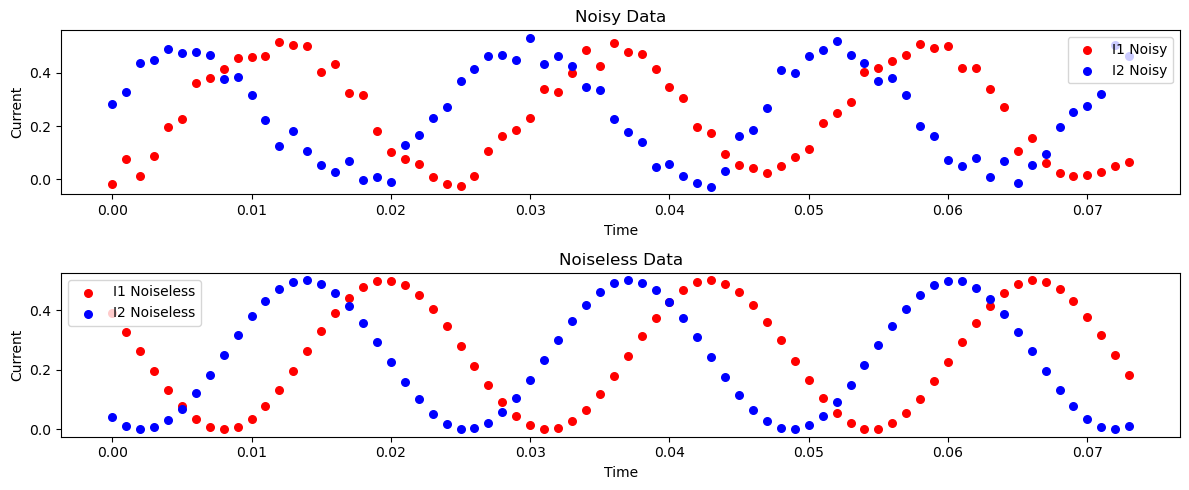

In [135]:
read_lambdas_rel = np.array(read_lambdas_rel)
I1 = 0.25*(1+np.sin(np.pi/4 + 2*np.pi*delta_x_start/read_lambdas_rel))
I2 = 0.25*(1-np.cos(np.pi/4 + 2*np.pi*delta_x_start/read_lambdas_rel))

#NOISE-LESS
lambdas_nonoise = np.linspace(lambda_start_real, lambda_end_real, len(time))
time_nonoise = np.arange(0, 1, time_step)
I1_nonoise = 0.25*(1+np.sin(np.pi/4 + 2*np.pi*delta_x_start/lambdas_nonoise))
I2_nonoise = 0.25*(1-np.cos(np.pi/4 + 2*np.pi*delta_x_start/lambdas_nonoise))

# Multiplicative noise (±x%)
percent = 0.03
I1_noisy = I1 + percent * rng.standard_normal(len(time))
I2_noisy = I2 + percent * rng.standard_normal(len(time))

plt.figure(figsize=(12, 5))

# --- Plot 1: Noisy Data ---
plt.subplot(2, 1, 1) # (2 rows, 1 column, plot 1)
plt.scatter(time, I1_noisy, color='red', s=30, label='I1 Noisy')
plt.scatter(time, I2_noisy, color='blue', s=30, label='I2 Noisy')
plt.title('Noisy Data')
plt.xlabel('Time')
plt.ylabel('Current')
plt.legend()

# --- Plot 2: Noiseless Data ---
plt.subplot(2, 1, 2) # (2 rows, 1 column, plot 2)
plt.scatter(time, I1_nonoise, color='red', s=30, label='I1 Noiseless')
plt.scatter(time, I2_nonoise, color='blue', s=30, label='I2 Noiseless')
plt.title('Noiseless Data')
plt.xlabel('Time')
plt.ylabel('Current')
plt.legend()

plt.tight_layout()
plt.show()

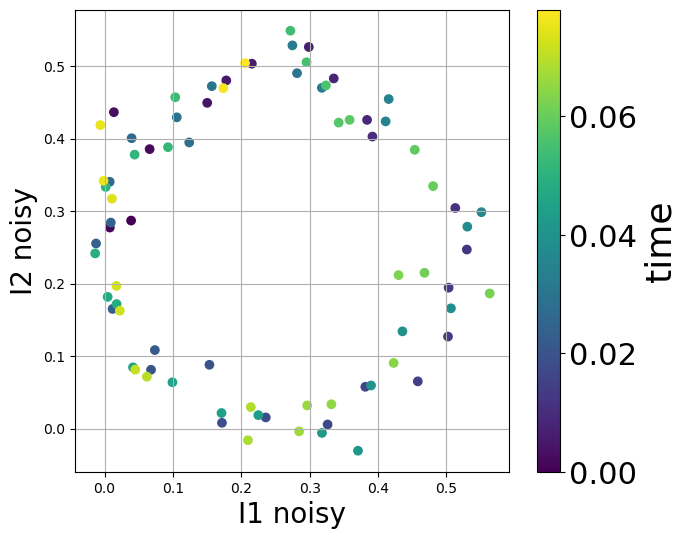

In [139]:
plt.figure(figsize=(7, 6))
plt.scatter(I1_noisy, I2_noisy, c=time, cmap="viridis")

# Colorbar
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22)
cbar.set_label('time', fontsize=26)   # label matches the data

plt.xlabel("I1 noisy", fontsize=20)
plt.ylabel("I2 noisy", fontsize=20)
plt.grid(True)
plt.show()

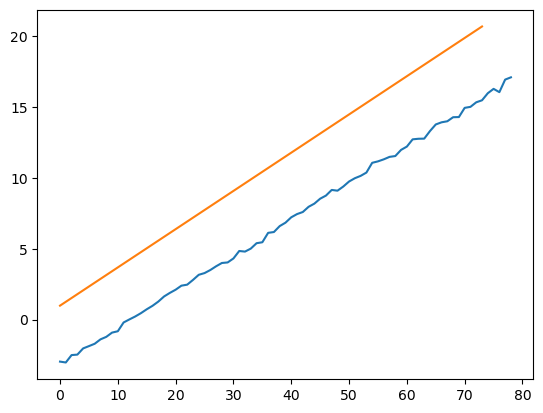

In [145]:
phi = -np.arctan2(I2_noisy-0.25, I1_noisy-0.25)
phi = np.unwrap(phi)
plt.plot(phi)

phi_nonoise = -np.arctan2(I2_nonoise-0.25, I1_nonoise-0.25)
phi_nonoise = np.unwrap(phi_nonoise)
plt.plot(phi_nonoise)

In [151]:
c = 3e8
N = (phi[-1] - phi[0])/(2*np.pi)
N*read_lambdas_rel[0]*read_lambdas_rel[-1]/(abs(read_lambdas_rel[0]-read_lambdas_rel[-1]))

2.5730417007875475

In [153]:
N = (phi_nonoise[-1] - phi_nonoise[0])/(2*np.pi)
N*lambda_start_real*lambda_end_real/(abs(lambda_start_real-lambda_end_real))

2.5299999999014324

In [ ]:
lambda_start_measured = 635e-9
n_trials = 200
results = []
rng = np.random.default_rng(seed=0)
for _ in range(n_trials):
    lambda_start_real = 635e-9 #m #not precisecly known!
    lambda_end_real = 635.05e-9 #m #not precisecly known!
    d_nu = 5e6 # Hz # Tuning STEP size resolution
    percent_jitter = 0.2   # ±2% variation
    lambdas = [lambda_start_real]
    while lambdas[-1] < lambda_end_real:
        jitter = 1 + rng.normal(0, percent_jitter)
        jitter = np.clip(jitter, 0.5, 1.5)   # keep step between 50%–150% of nominal
        lam_step = del_lambda(lambdas[-1], d_nu)
        noisy_step = lam_step * jitter
        lambdas.append(lambdas[-1] + noisy_step)
    lambdas = np.array(lambdas)
    abs_uncert_d_nu = 50e6 # Hz
    abs_uncert_d_lam = del_lambda(lambda_start_measured, abs_uncert_d_nu)
    abs_wavelength_readout_error = np.random.normal(0,abs_uncert_d_lam)
    new_lambdas = lambdas + abs_wavelength_readout_error
    new_lambdas_rel = []
    rel_uncert_d_nu = 1e6 # Hz
    rel_uncert_d_lam = del_lambda(lambda_start_measured, rel_uncert_d_nu)
    rel_wavelength_readout_error = np.random.normal(0, rel_uncert_d_lam)
    for i in range(len(new_lambdas)):
        new_lambdas_rel.append(new_lambdas[i] + np.random.normal(0,abs(rel_wavelength_readout_error)))
    time_step = 0.001
    time = np.arange(0, time_step*len(lambdas), time_step)

    new_lambdas_rel = np.array(new_lambdas_rel)
    I1 = 0.25*(1+np.sin(np.pi/4 + 2*np.pi*delta_x_start/new_lambdas_rel))
    I2 = 0.25*(1-np.cos(np.pi/4 + 2*np.pi*delta_x_start/new_lambdas_rel))
    
    # Multiplicative noise (±x%)
    percent = 0.03
    I1_noisy = I1 + percent * rng.standard_normal(len(time))
    I2_noisy = I2 + percent * rng.standard_normal(len(time))
    
    phi = -np.arctan2(I2_noisy-0.25, I1_noisy-0.25)
    phi = np.unwrap(phi)
    
    c = 3e8
    N = (phi[-1] - phi[0])/(2*np.pi)
    result = N*new_lambdas_rel[0]*new_lambdas_rel[-1]/(abs(new_lambdas_rel[0]-new_lambdas_rel[-1]))
    results.append(result)

results = np.array(results)

print(f"Mean result: {results.mean():.3e}")
print(f"Std dev: {results.std():.3e}")

# Optional: histogram
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.hist(results, bins=30, color="steelblue", alpha=0.7)
plt.xlabel("Computed value")
plt.ylabel("Counts")
plt.title("Monte Carlo distribution of final metric")
plt.grid(True)
plt.show()